# 1. python 이용한 test.txt 파일 저장과 조회 : 강의자료 34~38페이지

In [1]:
# MongoDB에 접속을 해줄 객체
from pymongo import MongoClient

In [3]:
# MongoDB에 python_test데이터 베이스에 접속
db = MongoClient().python_test
# Mongoclient : 객체 생성
# python_test : 접속할 DB이름으로 없는 경우 새로 만들고 이미 있는 경우는 해당 DB에 접속함
# db : MongoDB의 python_test DB에 레코드를 추가, 삭제, 조회할 객체를 만들 객체 리턴
# 대소문자 주의...!!!

In [4]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'python_test')

In [5]:
# python_test에 파일을 저장할 GridFS객체 생성
from gridfs import GridFS
fs = GridFS(db)

In [6]:
# "c:/ai/workspace/mongodb/test.txt"를 읽을 객체 f 생성
with open("c:/ai/workspace/mongodb/test.txt", 'rb') as f:
    print("f = ", f)
    print("f.read() = ", f.read())

f =  <_io.BufferedReader name='c:/ai/workspace/mongodb/test.txt'>
f.read() =  b'\xeb\xaa\xbd\xea\xb3\xa0DB GRIDFS\xec\x97\x90 \xec\xa0\x80\xec\x9e\xa5\xed\x95\xa0 \xeb\x82\xb4\xec\x9a\xa9'


In [7]:
# MongoDB에 test.txt.파일내용 저장
# fs.put -> f.read()호출 파일 내용 가져와서 MongoDB로 저장
with open("c:/ai/workspace/mongodb/test.txt", 'rb') as f:
    fs.put(f, filename = "test.txt")

In [8]:
# GridFS에 저장된 파일 조회
db.fs.files.find()

In [9]:
list(db.fs.files.find())

[{'_id': ObjectId('608f5c51c9acd662e1c43692'),
  'filename': 'test.txt',
  'md5': '0b97c2704cfb0e1892bb47a0b62bef96',
  'chunkSize': 261120,
  'length': 35,
  'uploadDate': datetime.datetime(2021, 5, 3, 2, 13, 37, 708000)},
 {'_id': ObjectId('608f7f72ac957ac19219ccd5'),
  'filename': '170719_cat01.png',
  'metadata': {'contentType': 'image/png'},
  'chunkSize': 261120,
  'md5': 'cd140b8bbfaddc966180d0c44bd6c9de',
  'length': 976423,
  'uploadDate': datetime.datetime(2021, 5, 3, 4, 44, 37, 642000)},
 {'_id': ObjectId('608fa5cccf8539db371128c3'),
  'filename': 'test.txt',
  'md5': '0b97c2704cfb0e1892bb47a0b62bef96',
  'chunkSize': 261120,
  'length': 35,
  'uploadDate': datetime.datetime(2021, 5, 3, 7, 27, 8, 84000)}]

In [13]:
# GridFS에 저장된 test.txt파일을 읽을 객체 f(가장 마지막에 업로드한 파일 내용 가져옴) 생성
f = fs.get_last_version(filename = "test.txt")

In [14]:
# test.txt파일 내용을 읽어서 data에 저장
data = f.read()
data

b'\xeb\xaa\xbd\xea\xb3\xa0DB GRIDFS\xec\x97\x90 \xec\xa0\x80\xec\x9e\xa5\xed\x95\xa0 \xeb\x82\xb4\xec\x9a\xa9'

In [15]:
# data에 저장된 내용을 utf-8로 인코딩하여 출력
data.decode("utf-8")

'몽고DB GRIDFS에 저장할 내용'

# 2. python 이용한 MongDB 이미지 파일 저장 : 강의자료 40~42 페이지

In [16]:
# 라이브러리 임포트
from pymongo import MongoClient

In [17]:
# mongodb에 접속할 객체 생성
# mongodb에 python_test 데이터베이스 접속
db = MongoClient().python_test

In [21]:
# 이미지 url
url = "https://image-notepet.akamaized.net/resize/620x-/seimage/20191114%2F6a4c967c5b14197dd5d2c47424ae8e82.jpg"

In [22]:
import urllib.request

In [23]:
# url에서 이미지를 가져올 객체 생성
# read() : 데이터 가져옴
urllib.request.urlopen(url).read()

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 75\n\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02l\x02l\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5

In [24]:
# 이미지의 내용을 읽어서 data에 저장
data = urllib.request.urlopen(url).read()

In [25]:
# 그림으로 보고싶다
! pip install image

In [26]:
! pip install pillow

In [27]:
# 이미지를 읽는 방법
from io import BytesIO

In [28]:
from PIL import Image

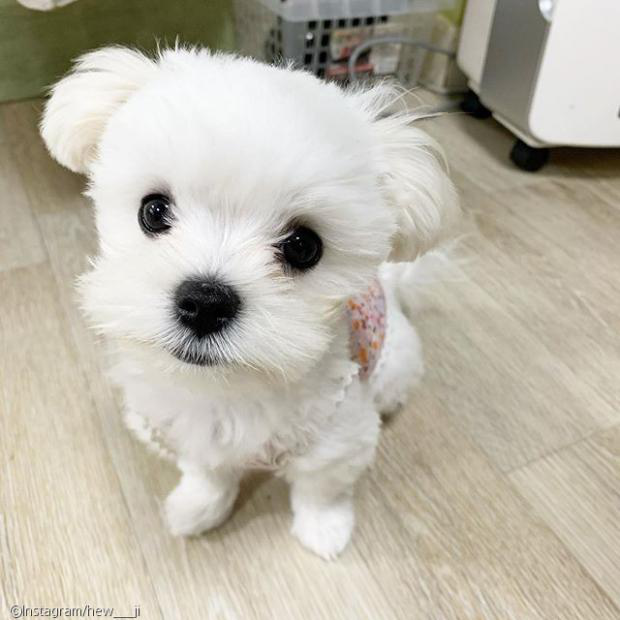

In [29]:
Image.open(BytesIO(data))

In [30]:
# 이미지 파일을 저장해 줄 객체 bucket
from gridfs import GridFSBucket

In [31]:
bucket = GridFSBucket(db)

In [32]:
bucket

In [33]:
# 이미지 파일을 GridFS에 저장할 객체 grid_in 생성
grid_in = bucket.open_upload_stream(
    "20191114%2F6a4c967c5b14197dd5d2c47424ae8e82.jpg",
    metadata = {"contentType" : "image/jpg"})

In [34]:
# write로 파일 업로드
grid_in.write(data)

In [35]:
# 이미지 저장 종료
grid_in.close()

# 3. python 이용한 MongoDB에 저장된 이미지 조회 : 강의자료 43~ 48페이지

In [36]:
! pip install image

In [37]:
! pip install pillow

In [38]:
from pymongo import MongoClient

In [39]:
# mongodb에 python_test 데이터베이스에 접속
db = MongoClient().python_test

In [40]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'python_test')

In [41]:
# fs.files : table명 (저장된 파일 정보 조회)
db.fs.files.find()

In [42]:
# 저장된 데이터 정보 조회
list(db.fs.files.find())

[{'_id': ObjectId('608f5c51c9acd662e1c43692'),
  'filename': 'test.txt',
  'md5': '0b97c2704cfb0e1892bb47a0b62bef96',
  'chunkSize': 261120,
  'length': 35,
  'uploadDate': datetime.datetime(2021, 5, 3, 2, 13, 37, 708000)},
 {'_id': ObjectId('608f7f72ac957ac19219ccd5'),
  'filename': '170719_cat01.png',
  'metadata': {'contentType': 'image/png'},
  'chunkSize': 261120,
  'md5': 'cd140b8bbfaddc966180d0c44bd6c9de',
  'length': 976423,
  'uploadDate': datetime.datetime(2021, 5, 3, 4, 44, 37, 642000)},
 {'_id': ObjectId('608fa5cccf8539db371128c3'),
  'filename': 'test.txt',
  'md5': '0b97c2704cfb0e1892bb47a0b62bef96',
  'chunkSize': 261120,
  'length': 35,
  'uploadDate': datetime.datetime(2021, 5, 3, 7, 27, 8, 84000)},
 {'_id': ObjectId('608fab30cf8539db371128c6'),
  'filename': '20191114%2F6a4c967c5b14197dd5d2c47424ae8e82.jpg',
  'metadata': {'contentType': 'image/jpg'},
  'chunkSize': 261120,
  'md5': 'a417897b8c8f5c1dd0a898c17832f190',
  'length': 40709,
  'uploadDate': datetime.dateti

In [43]:
# 저장된 3번째 데이터 조회
db.fs.files.find()[3]

{'_id': ObjectId('608fab30cf8539db371128c6'),
 'filename': '20191114%2F6a4c967c5b14197dd5d2c47424ae8e82.jpg',
 'metadata': {'contentType': 'image/jpg'},
 'chunkSize': 261120,
 'md5': 'a417897b8c8f5c1dd0a898c17832f190',
 'length': 40709,
 'uploadDate': datetime.datetime(2021, 5, 3, 7, 51, 18, 216000)}

In [45]:
# 저장된 3번째 데이터의 파일명 조회
db.fs.files.find()[3]["filename"]

'20191114%2F6a4c967c5b14197dd5d2c47424ae8e82.jpg'

In [46]:
from gridfs import GridFS

In [47]:
# python_test에 파일을 저장할 GridFS 객체 생성
fs = GridFS(db)

In [49]:
# 파일명이 일치하는 마지막 파일의 내용을 가져올 객체 f 리턴
# 가장 마지막에 업로드한 파일 내용 가져올 객체 생성
f = fs.get_last_version(filename = db.fs.files.find()[3]["filename"])

In [50]:
# 가장 마지막에 업로드한 파일의 내용을 읽어와서 data에 저장
data = f.read()

In [51]:
data

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 75\n\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02l\x02l\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5

In [53]:
# 이미지를 보고 싶다
# 대소문자 주의!!!
from PIL import Image
from io import BytesIO

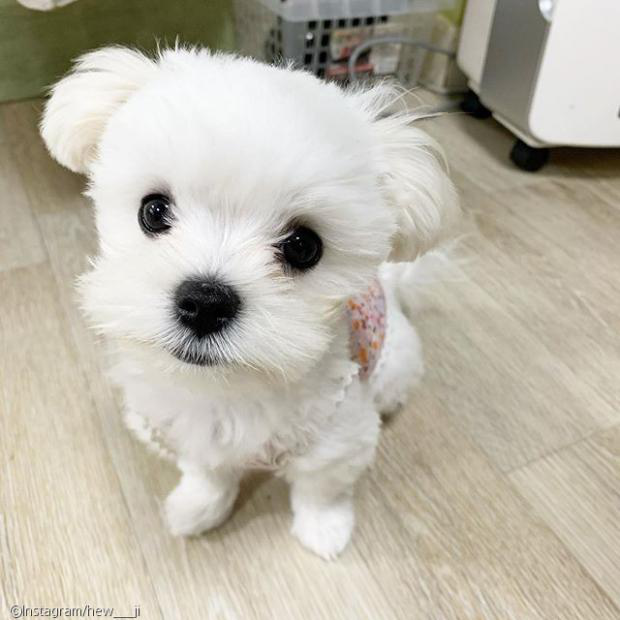

In [54]:
# BytesIO : data에 있는 이미지 내용 읽어들임
# image.open : BytesIO가 읽은 내용을 화면에 출력
Image.open( BytesIO(data) )

In [55]:
from IPython.display import display

In [56]:
# data의 내용을 이미지로 변환해서 image에 저장
image = Image.open(BytesIO(data))

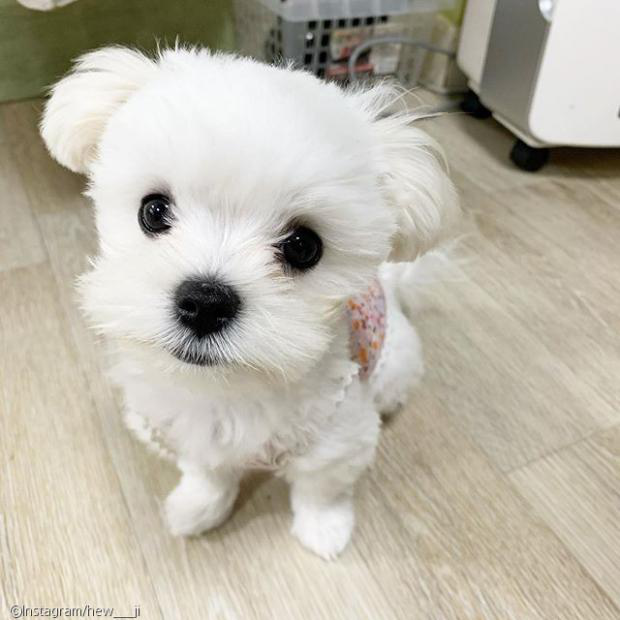

In [57]:
# image 출력
display(image)

# 4. 네이버 API 를 이용한 강아지 고양이 이미지 검색 : 강의자료 66~69페이지

## 네이버 개발자 사이트 접속(https://developers.naver.com/)
## Documents -> 서비스 API -> 검색 -> 이미지 -> API 기본정보 Json 요청 URL 복사

In [58]:
url = "https://openapi.naver.com/v1/search/image?query=수달"

In [59]:
# 수달 이미지가 몇개인지 알아보기
import requests

In [60]:
#네이버 API 인증  정보
client_id = "udzt3jcCA8xTKi3UjGH_" 
client_secret = "HAk0g9n8cs"

In [61]:
# headers에 추가될 내용
api_id_pw = {'X-Naver-Client-ID' : client_id, 'X-Naver-Client-Secret' : client_secret}

In [62]:
# url 접속해서 검색결과 가져올 객체 생성
# 성공여부(200), 실패(400)
requests.get(url, headers = api_id_pw)

<Response [200]>

In [63]:
result = requests.get(url, headers = api_id_pw)

In [64]:
result

<Response [200]>

In [65]:
# 검색결과를 가져와 출력
result.json

<bound method Response.json of <Response [200]>>

In [66]:
result.json()["items"]

[{'title': '..and then she told me...(이미지 포함) | 수달, 동물',
  'link': 'https://i.pinimg.com/736x/30/d3/a0/30d3a0acc815b957fe893909560b46f3--otter-too-cute.jpg',
  'thumbnail': 'https://search.pstatic.net/sunny/?src=https://i.pinimg.com/736x/30/d3/a0/30d3a0acc815b957fe893909560b46f3--otter-too-cute.jpg&type=b150',
  'sizeheight': '600',
  'sizewidth': '510'},
 {'title': '[화보] 민물계의 최강자, 수달',
  'link': 'http://imgnews.naver.net/image/144/2016/05/25/l_20160525020010282002649913_99_20160525183503.jpg',
  'thumbnail': 'https://search.pstatic.net/common/?src=http://imgnews.naver.net/image/144/2016/05/25/l_20160525020010282002649913_99_20160525183503.jpg&type=b150',
  'sizeheight': '400',
  'sizewidth': '600'},
 {'title': "[멸종저항보고서⑬-2] '강의 파수꾼' 수달, 이제 우리가 지킬 때",
  'link': 'http://imgnews.naver.net/image/5337/2021/02/10/0000112081_001_20210213114742995.jpg',
  'thumbnail': 'https://search.pstatic.net/common/?src=http://imgnews.naver.net/image/5337/2021/02/10/0000112081_001_20210213114742995.jpg&ty

In [67]:
for item in result.json()['items'] :
    print("="*30)
    print("item")
    print("="*30)
    print(item)

item
{'title': '..and then she told me...(이미지 포함) | 수달, 동물', 'link': 'https://i.pinimg.com/736x/30/d3/a0/30d3a0acc815b957fe893909560b46f3--otter-too-cute.jpg', 'thumbnail': 'https://search.pstatic.net/sunny/?src=https://i.pinimg.com/736x/30/d3/a0/30d3a0acc815b957fe893909560b46f3--otter-too-cute.jpg&type=b150', 'sizeheight': '600', 'sizewidth': '510'}
item
{'title': '[화보] 민물계의 최강자, 수달', 'link': 'http://imgnews.naver.net/image/144/2016/05/25/l_20160525020010282002649913_99_20160525183503.jpg', 'thumbnail': 'https://search.pstatic.net/common/?src=http://imgnews.naver.net/image/144/2016/05/25/l_20160525020010282002649913_99_20160525183503.jpg&type=b150', 'sizeheight': '400', 'sizewidth': '600'}
item
{'title': "[멸종저항보고서⑬-2] '강의 파수꾼' 수달, 이제 우리가 지킬 때", 'link': 'http://imgnews.naver.net/image/5337/2021/02/10/0000112081_001_20210213114742995.jpg', 'thumbnail': 'https://search.pstatic.net/common/?src=http://imgnews.naver.net/image/5337/2021/02/10/0000112081_001_20210213114742995.jpg&type=b150', 

In [68]:
# 검색결과(딕셔너리)에서 수달 이미지의 url(link)만 가져오기
for item in result.json()["items"] :
    print("="*30)
    print("item")
    print("="*30)
    print(item["link"])

item
https://i.pinimg.com/736x/30/d3/a0/30d3a0acc815b957fe893909560b46f3--otter-too-cute.jpg
item
http://imgnews.naver.net/image/144/2016/05/25/l_20160525020010282002649913_99_20160525183503.jpg
item
http://imgnews.naver.net/image/5337/2021/02/10/0000112081_001_20210213114742995.jpg
item
https://i.pinimg.com/736x/e9/c0/b0/e9c0b05845a9c20967593fa1ba5553e2--downton-abbey-season--january-.jpg
item
https://i.pinimg.com/736x/73/21/47/7321471fba3c5af8befe28785c1a949f--bedrooms-les.jpg
item
http://imgnews.naver.net/image/5169/2017/12/13/0000014898_001_20171213142220664.png
item
http://imgnews.naver.net/image/022/2016/03/07/20160307000433_0_99_20160307103804.jpg
item
http://imgnews.naver.net/image/081/2020/10/07/0003129365_003_20201007073120143.jpg
item
https://i.pinimg.com/736x/cc/06/dc/cc06dc88aa1cd6496b4ac25de7de2597--sea-otter-spirit-animal.jpg
item
https://i.pinimg.com/736x/8a/04/9e/8a049ea68a44920abcc6c19177d6c69f.jpg


In [69]:
# 함수를 만들자
# 네이버 OPEN API에서 고양이와 강아지 이미지를 검색
# keyword : 검색어 (수달)
# display : 검색 결과의 개수
# start : 시작 인덱스

def get_api_result(keyword, display, start) :
    url = "https://openapi.naver.com/v1/search/image?query="\
            + keyword + "&display="+str(display)+\
            "&start="+str(start)
    print("url = ", url)
    result = requests.get(url, headers = api_id_pw) # 검색할 객체 생성하여 결과를 result에 저장
    return result.json() # 이미지 검색 결과 리턴

In [70]:
get_api_result("수달", 100, 301)

url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=301


{'lastBuildDate': 'Mon, 03 May 2021 17:19:32 +0900',
 'total': 38259,
 'start': 301,
 'display': 100,
 'items': [{'title': '立春, 포근한 날씨 만끽하는 수달',
   'link': 'http://imgnews.naver.net/image/001/2007/02/04/kp1_070204025200.jpg',
   'thumbnail': 'https://search.pstatic.net/common/?src=http://imgnews.naver.net/image/001/2007/02/04/kp1_070204025200.jpg&type=b150',
   'sizeheight': '430',
   'sizewidth': '298'},
  {'title': "코엑스아쿠아리움, 수달과 함께하는 '수달전국자랑' 이벤트 실시",
   'link': 'http://imgnews.naver.net/image/5181/2020/08/28/0001844017_001_20200828151821252.jpg',
   'thumbnail': 'https://search.pstatic.net/common/?src=http://imgnews.naver.net/image/5181/2020/08/28/0001844017_001_20200828151821252.jpg&type=b150',
   'sizeheight': '387',
   'sizewidth': '580'},
  {'title': 'Otters :)에 관한 48개의 최상의 Pinterest 이미지 | 수달, 아기 동물 및 야생 동물 Otters :)',
   'link': 'https://i.pinimg.com/736x/63/e9/4c/63e94c5e5588e35d2ce0442e1874c9bf--the-otter-koala.jpg',
   'thumbnail': 'https://search.pstatic.net/sunny/?src=htt

In [71]:
# keyword : 검색어(수달)
# total_page : 검색할 전체 페이지 (100개씩 10페이지 전체 1000개의 이미지를 검색)

def call_and_print(keyword, total_page=10):
    # 네이버 이미지 검색 결과에서 이미지를 다운 받을 url을 저장 할 리스트
    link_list = []
    # 1에서부터 total_page(10페이지)+1  미만 만큼 반복
    for page in range(1, total_page+1) :
        # 한 페이지당 100개의 이미지 정보를 검색
        display = 100
        # 페이지 시작 인덱스 한페이지당 100개씩 검색하므로 1페이지는 1, 2페이지는 101, 3은 201 ...
        start = ((page-1)*display)+1
        # get_api_result(keyword, display, start) : 네이버 이미지 검색 API를 호출하고 결과를 리턴받아 json_obj에 대입
        json_obj = get_api_result(keyword, display, start)
        # 검색 결과에서 json_obj['items']에 이미지를 다운 받을 URL이 저장되 있으므로 json_obj["item"]을 link_list에 저장
        for item in json_obj['items'] :
            link_list.append(item['link'])
    # 이미지를 다운로드할 url이 저장된 link_list를 리턴
    return link_list

In [72]:
call_and_print("수달")

url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=1
url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=101
url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=201
url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=301
url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=401
url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=501
url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=601
url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=701
url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=801
url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=901


['https://i.pinimg.com/736x/30/d3/a0/30d3a0acc815b957fe893909560b46f3--otter-too-cute.jpg',
 'http://imgnews.naver.net/image/144/2016/05/25/l_20160525020010282002649913_99_20160525183503.jpg',
 'http://imgnews.naver.net/image/5337/2021/02/10/0000112081_001_20210213114742995.jpg',
 'https://i.pinimg.com/736x/e9/c0/b0/e9c0b05845a9c20967593fa1ba5553e2--downton-abbey-season--january-.jpg',
 'https://i.pinimg.com/736x/73/21/47/7321471fba3c5af8befe28785c1a949f--bedrooms-les.jpg',
 'http://imgnews.naver.net/image/5169/2017/12/13/0000014898_001_20171213142220664.png',
 'http://imgnews.naver.net/image/022/2016/03/07/20160307000433_0_99_20160307103804.jpg',
 'http://imgnews.naver.net/image/081/2020/10/07/0003129365_003_20201007073120143.jpg',
 'https://i.pinimg.com/736x/cc/06/dc/cc06dc88aa1cd6496b4ac25de7de2597--sea-otter-spirit-animal.jpg',
 'https://i.pinimg.com/736x/8a/04/9e/8a049ea68a44920abcc6c19177d6c69f.jpg',
 'http://imgnews.naver.net/image/5719/2020/09/02/0000057658_001_2020113018505701

In [77]:
lst2 = call_and_print("수달")

url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=1
url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=101
url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=201
url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=301
url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=401
url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=501
url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=601
url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=701
url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=801
url =  https://openapi.naver.com/v1/search/image?query=수달&display=100&start=901


In [78]:
len(lst2)

1000

In [73]:
# total_page도 입력하고 싶다
def call_and_print_num(keyword, total_page):
    # 네이버 이미지 검색 결과에서 이미지를 다운 받을 url을 저장 할 리스트
    link_list = []
    # 1에서부터 total_page(10페이지)+1  미만 만큼 반복
    for page in range(1, total_page+1) :
        # 한 페이지당 100개의 이미지 정보를 검색
        display = 100
        # 페이지 시작 인덱스 한페이지당 100개씩 검색하므로 1페이지는 1, 2페이지는 101, 3은 201 ...
        start = ((page-1)*display)+1
        # get_api_result(keyword, display, start) : 네이버 이미지 검색 API를 호출하고 결과를 리턴받아 json_obj에 대입
        json_obj = get_api_result(keyword, display, start)
        # 검색 결과에서 json_obj['items']에 이미지를 다운 받을 URL이 저장되 있으므로 json_obj["item"]을 link_list에 저장
        for item in json_obj['items'] :
            link_list.append(item['link'])
    # 이미지를 다운로드할 url이 저장된 link_list를 리턴
    return link_list

In [75]:
lst1 = call_and_print_num("고양이", 2)

url =  https://openapi.naver.com/v1/search/image?query=고양이&display=100&start=1
url =  https://openapi.naver.com/v1/search/image?query=고양이&display=100&start=101


In [76]:
len(lst1)

200

In [79]:
lst3 = call_and_print_num("고양이", 7)

url =  https://openapi.naver.com/v1/search/image?query=고양이&display=100&start=1
url =  https://openapi.naver.com/v1/search/image?query=고양이&display=100&start=101
url =  https://openapi.naver.com/v1/search/image?query=고양이&display=100&start=201
url =  https://openapi.naver.com/v1/search/image?query=고양이&display=100&start=301
url =  https://openapi.naver.com/v1/search/image?query=고양이&display=100&start=401
url =  https://openapi.naver.com/v1/search/image?query=고양이&display=100&start=501
url =  https://openapi.naver.com/v1/search/image?query=고양이&display=100&start=601


In [80]:
len(lst3)

700